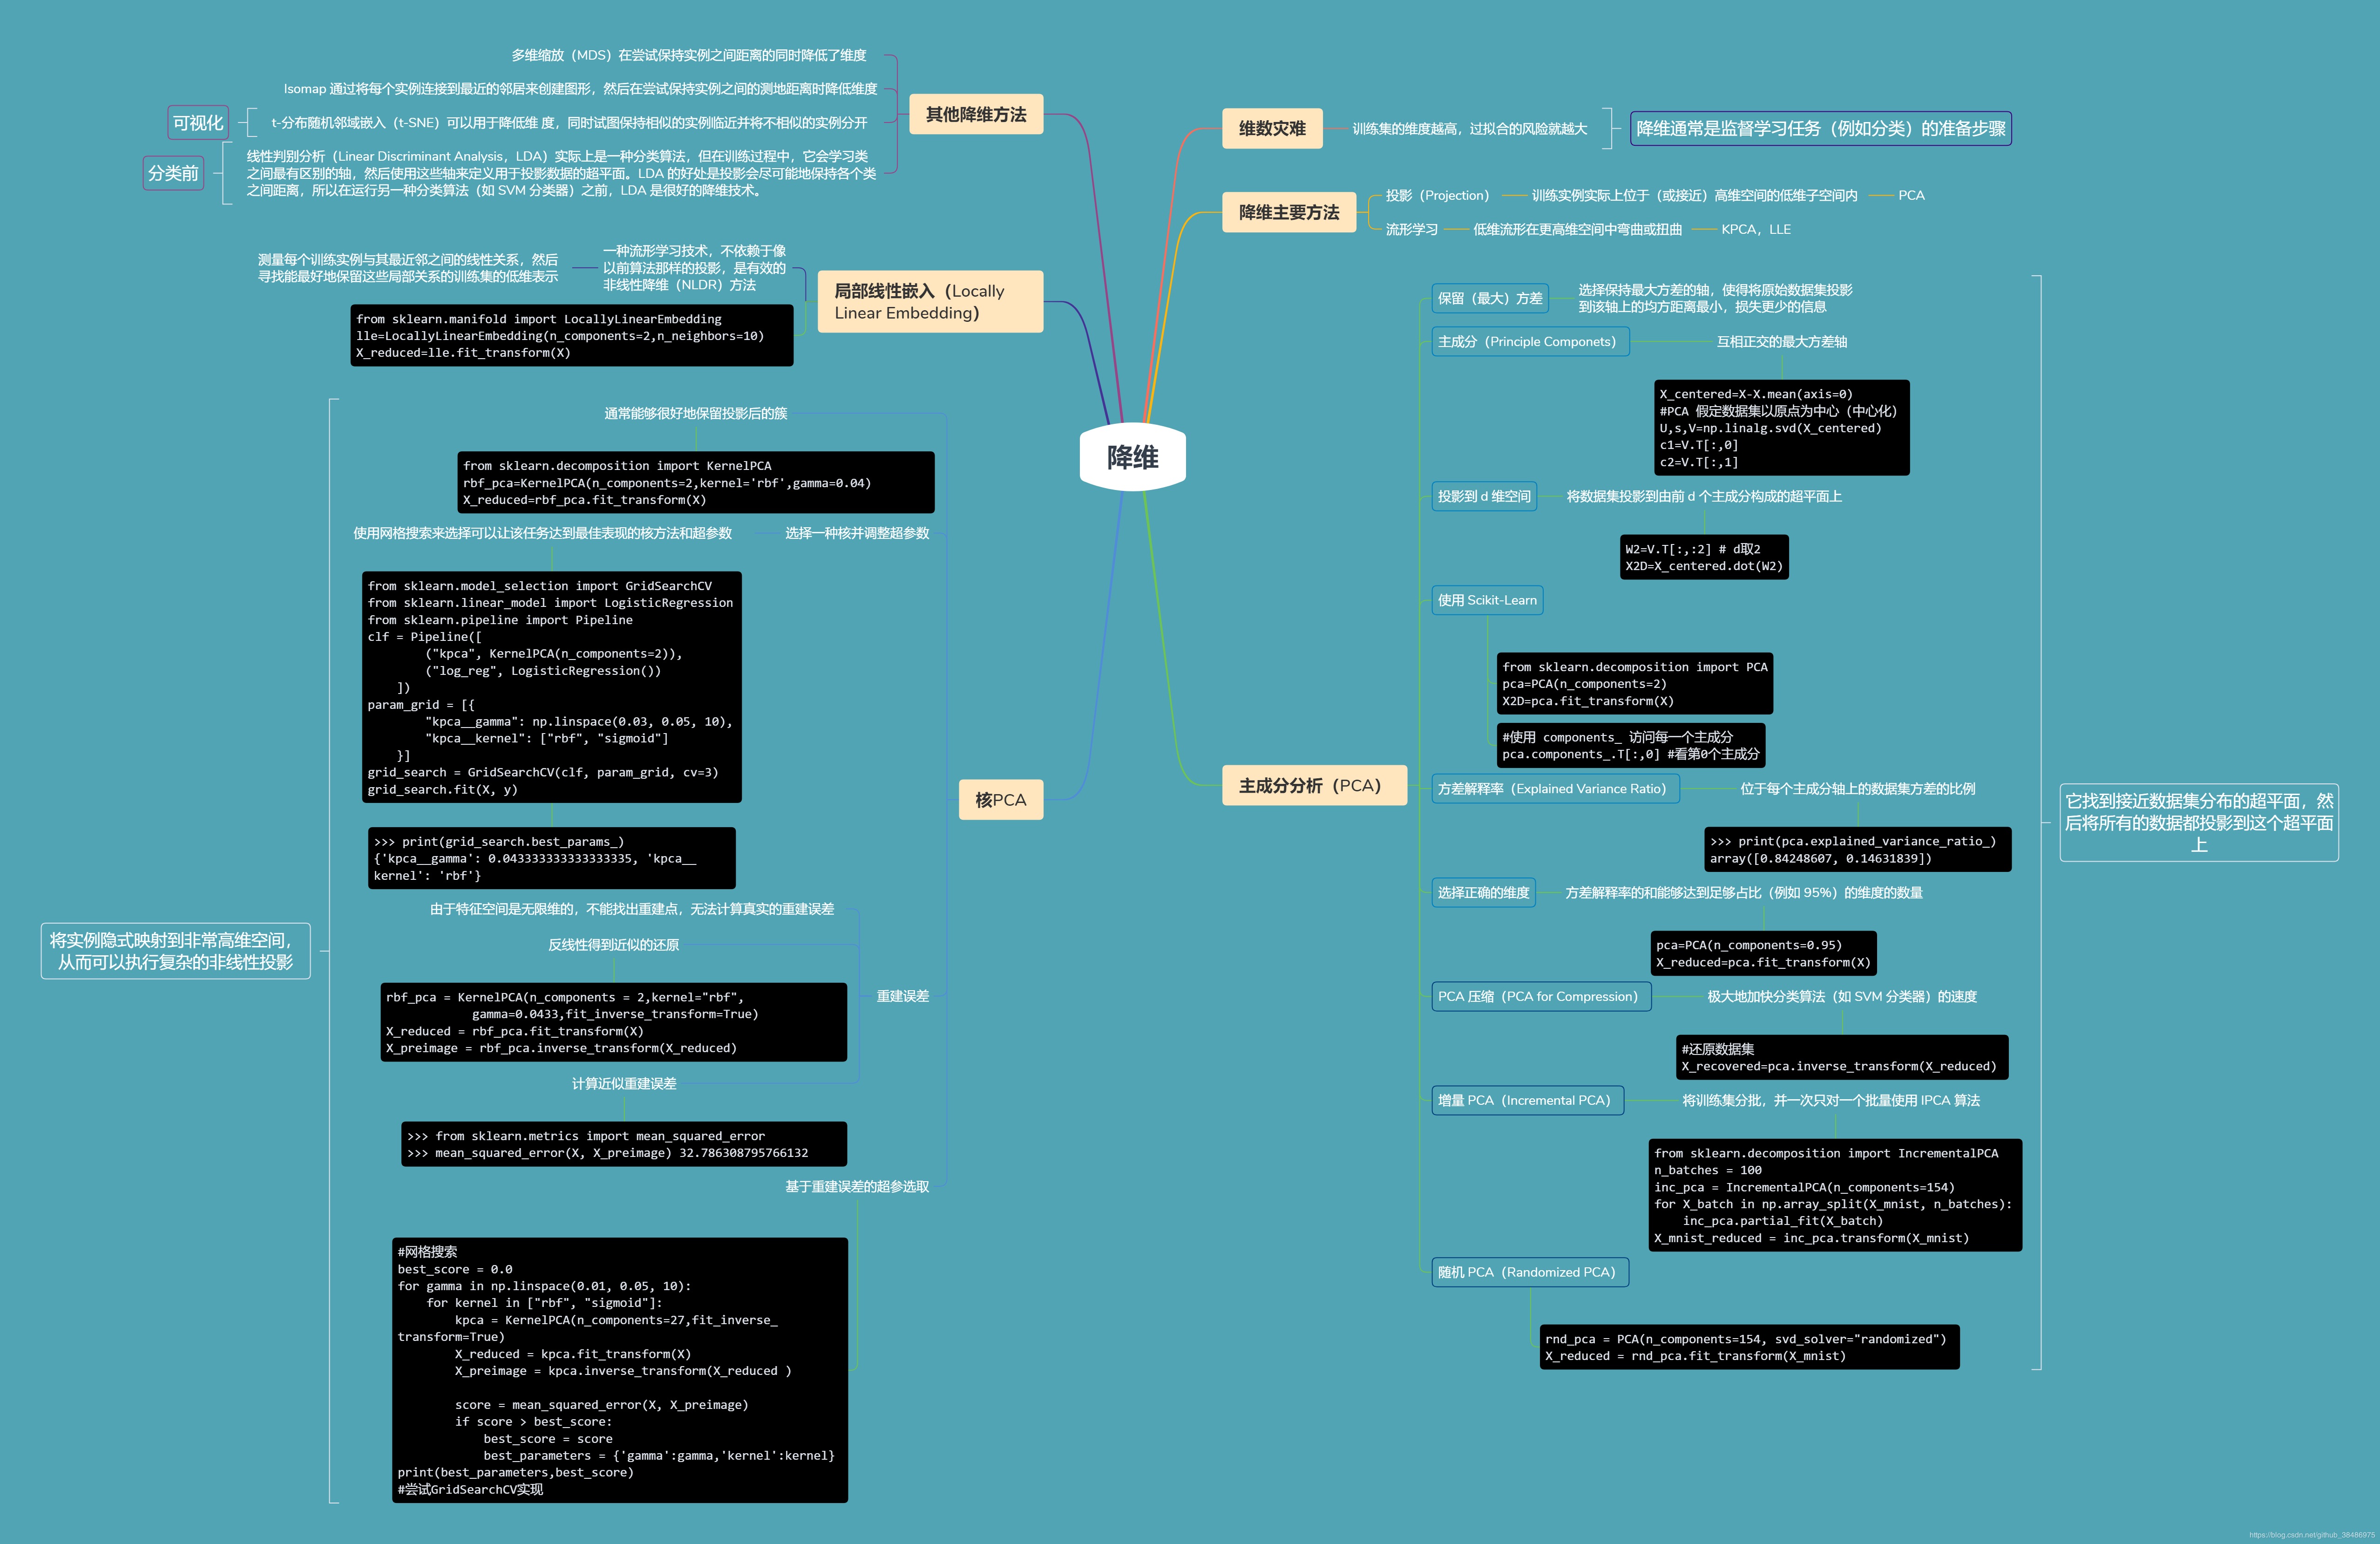

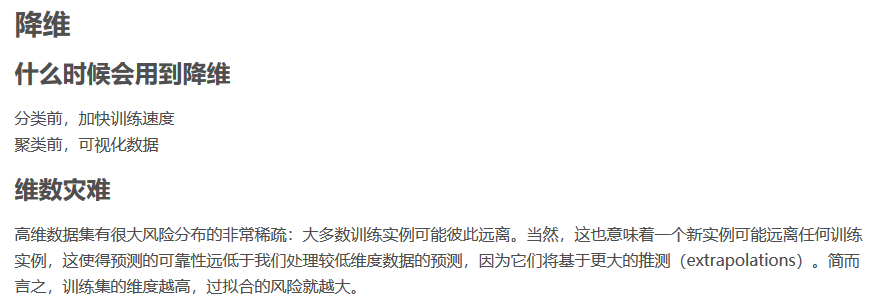

# 1.投影（Projection）

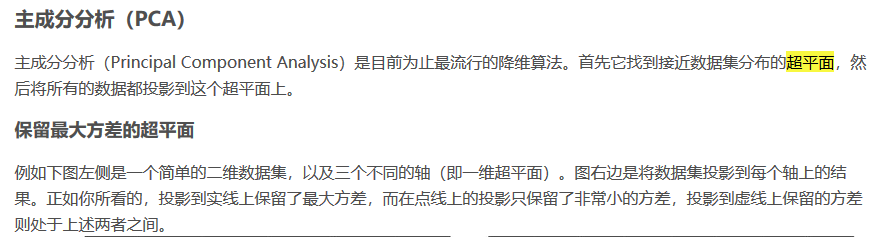

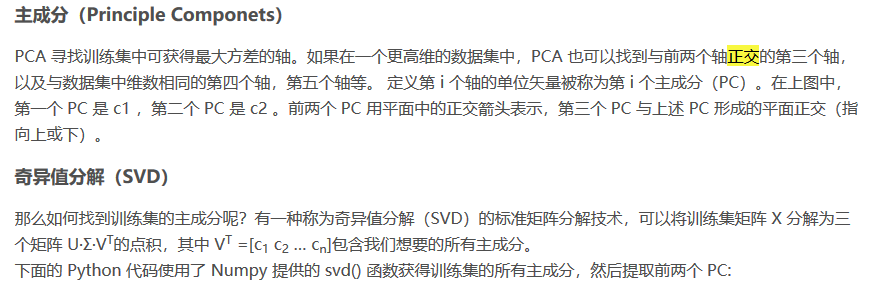

In [15]:
import numpy as np
X = np.random.randn(2000).reshape(100, 20)
X

array([[ 0.54398612, -0.01790558,  0.86627949, ..., -1.92628563,
         0.0757    , -0.54223303],
       [ 0.89551332, -0.13971367,  0.71192906, ...,  0.1824517 ,
         0.67990777,  2.30793101],
       [ 0.25235371, -1.82541597, -0.99729562, ...,  1.32199674,
        -0.67885986, -1.27337284],
       ...,
       [ 0.05956294, -1.24177646, -0.68394781, ...,  0.45492069,
        -1.6101693 , -0.53993624],
       [-1.80346218,  0.62436921, -0.87054842, ...,  1.06661616,
         1.43844892,  0.33810465],
       [ 1.65743769,  0.56484257,  0.83442321, ...,  0.58981624,
        -0.91801232, -0.53060098]])

奇异值分解：
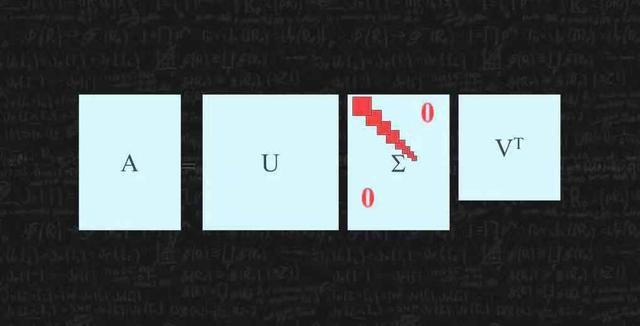

In [16]:
X_centered=X-X.mean(axis=0)
U,s,V=np.linalg.svd(X_centered)
c1=V.T[:,0]
c2=V.T[:,1]

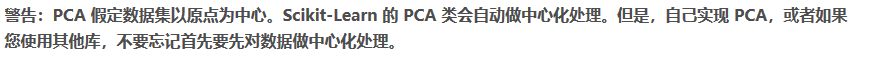

In [20]:
W2=V.T[:,:2]
X2D=X_centered.dot(W2)
X2D[:8,:]

array([[-1.17681284,  0.71295929],
       [-0.37505709, -1.02738239],
       [ 1.14400094,  1.52094302],
       [-0.4259525 , -0.18260679],
       [-1.07945629,  0.79885745],
       [-0.65505193,  0.82637425],
       [ 1.97318363,  0.31803849],
       [ 2.50954286, -0.70582582]])

# PCA

In [28]:
from sklearn.decomposition import PCA
pca=PCA(n_components=2)
X2D=pca.fit_transform(X)
X2D[:8,:]

array([[ 1.17681284,  0.71295929],
       [ 0.37505709, -1.02738239],
       [-1.14400094,  1.52094302],
       [ 0.4259525 , -0.18260679],
       [ 1.07945629,  0.79885745],
       [ 0.65505193,  0.82637425],
       [-1.97318363,  0.31803849],
       [-2.50954286, -0.70582582]])

In [30]:
# 可以使用 components_ 访问每一个主成分:
pca.components_.T[:,0]

comp = pca.components_ #30x104
com_tr = np.transpose(pca.components_) #104x30
proj = np.dot(X_test,com_tr) #279180x104 * 104x30 = 297180x

array([ 0.01841335, -0.05391631,  0.31035252, -0.25620019,  0.26611891,
        0.34257207,  0.21823653, -0.14734661, -0.32420138,  0.0240113 ,
       -0.25875668, -0.02079563, -0.10835854, -0.1782949 ,  0.40548269,
        0.06653882,  0.05462887, -0.41824906,  0.01245209,  0.11733365])

方差解释率（Explained Variance Ratio）

它表示位于每个主成分轴上的数据集方差的比例

In [31]:
print(pca.explained_variance_ratio_)

[0.0961678  0.09069678]


# 核 PCA（Kernel PCA）

In [32]:
from sklearn.decomposition import KernelPCA
rbf_pca=KernelPCA(n_components=2,kernel='rbf',gamma=0.04)
X_reduced=rbf_pca.fit_transform(X)

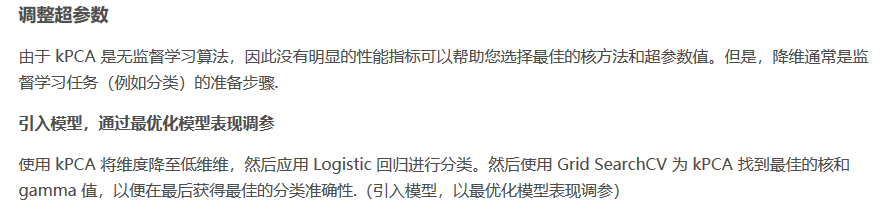

In [46]:
import numpy as np
from sklearn.model_selection import GridSearchCV 
from sklearn.linear_model import LogisticRegression 
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
clf = Pipeline([
        ('ss', StandardScaler()),
        ("kpca", KernelPCA(n_components=27)),
        ("log_reg", LogisticRegression())
        ])

param_grid = [{"kpca__gamma": np.linspace(0.01, 0.05, 10),"kpca__kernel": ["rbf", "sigmoid"]}]
grid_search = GridSearchCV(clf, param_grid, cv=3)
grid_search.fit(X, y)

#通过调用 best_params_ 变量来查看使模型效果最好的核和超参数：
print(grid_search.best_params_)#{'kpca__gamma': 0.014444444444444444, 'kpca__kernel': 'rbf'}

{'kpca__gamma': 0.014444444444444444, 'kpca__kernel': 'rbf'}


In [37]:
#用最好参数降维并重建，计算重建误差
rbf_pca = KernelPCA(n_components = 27, kernel="rbf", gamma=0.014,fit_inverse_transform=True)
X_reduced = rbf_pca.fit_transform(X)
X_preimage = rbf_pca.inverse_transform(X_reduced)
from sklearn.metrics import mean_squared_error
mean_squared_error(X, X_preimage)#18.690646428102291

4.267523043042066e-30

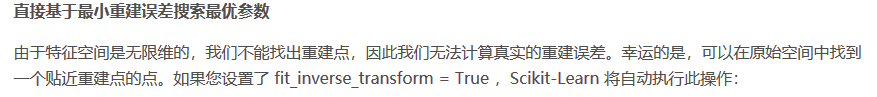

In [38]:
best_score = 0.0
for gamma in np.linspace(0.01, 0.05, 10):
    for kernel in ["rbf", "sigmoid"]:
        kpca = KernelPCA(n_components=27,fit_inverse_transform=True)
        X_reduced = kpca.fit_transform(X)
        X_preimage = kpca.inverse_transform(X_reduced )
        
        score = mean_squared_error(X, X_preimage)
        if score > best_score:
            best_score = score
            best_parameters = {'gamma':gamma,'kernel':kernel}
print(best_parameters,best_score)#{'gamma': 0.01, 'kernel': 'rbf'} 42.0263802221

rbf_pca = KernelPCA(n_components = 27, kernel="rbf", gamma=0.01,fit_inverse_transform=True)
X_reduced = rbf_pca.fit_transform(X)
X_preimage = rbf_pca.inverse_transform(X_reduced)
mean_squared_error(X, X_preimage)#18.506800211603057

{'gamma': 0.01, 'kernel': 'rbf'} 1.647029717323604e-30


4.623602514077813e-30

# LDA

In [10]:
from sklearn import datasets
iris = datasets.load_iris() # 导入数据集
X = iris.data # 获得其特征向量
y = iris.target # 获得样本label

In [11]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
sklearn_lda = LDA(n_components = 2)
X_lda_sklearn = sklearn_lda.fit_transform(X, y)

In [16]:
# 将标签编码
from sklearn.preprocessing import LabelEncoder
enc = LabelEncoder()
label_encoder = enc.fit(y)
y = label_encoder.transform(y) + 1
label_dict = {index+1:label for index,label in enumerate(enc.classes_)}
# label_dict = {1: 'Iris-setosa', 2: 'Iris-versicolor', 3: 'Iris-virginica'}

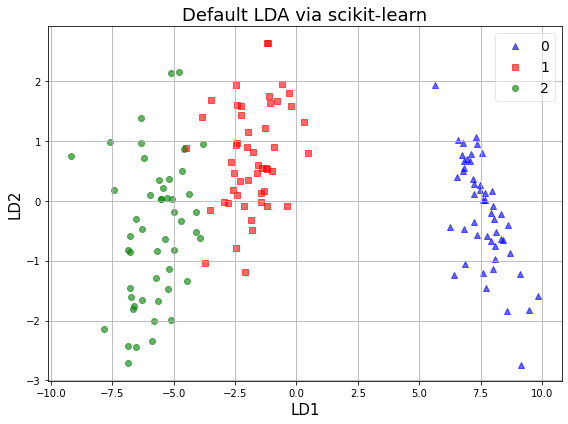

In [18]:
import matplotlib.pyplot as plt

def plot_scikit_lda(X, title):
    fig,ax = plt.subplots(figsize=(8,6))
    for label,marker,color in zip(range(1,4),('^','s','o'),('blue','red','green')):
        plt.scatter(x=X[:,0][y==label],y=X[:,1][y==label]*-1,marker=marker,color=color,alpha=0.6,label=label_dict[label])
    plt.xlabel('LD1',fontsize=15)
    plt.ylabel('LD2',fontsize=15)
    
    leg = plt.legend(loc='best', fontsize=14, fancybox=True)
    leg.get_frame().set_alpha(0.5)
    plt.title(title, fontsize=18)
    
#     plt.tick_params(axis='both',which='both',bottom='off',top='off',labelbottom='on',
#                     left='off',right='off',labelleft='on')
#     ax.spines['top'].set_visible(False)
#     ax.spines['bottom'].set_visible(False)
#     ax.spines['left'].set_visible(False)
#     ax.spines['right'].set_visible(False)
    
    plt.grid()
    plt.tight_layout()
    plt.show()
    
plot_scikit_lda(X_lda_sklearn, title='Default LDA via scikit-learn')

# 多维尺度变换（MDS)

In [22]:
from sklearn import datasets
iris = datasets.load_iris() # 导入数据集
X = iris.data # 获得其特征向量

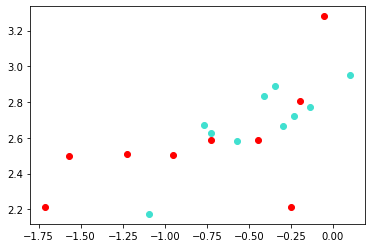

In [26]:
import numpy as np
from sklearn.manifold import MDS
import matplotlib.pyplot as plt

mds = MDS()
mds.fit(X)
a = mds.embedding_
plt.scatter(a[:10,0],a[:10,1],color='turquoise')
plt.scatter(a[11:20,0],a[11:20,1],color='red')

# 2.流行学习

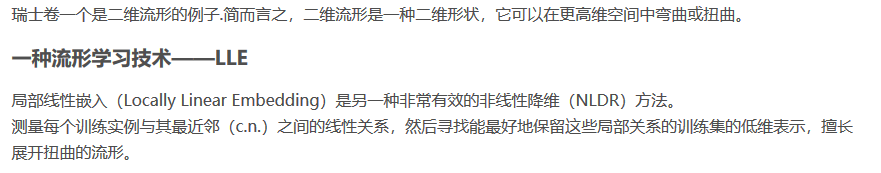

In [33]:
from sklearn.manifold import LocallyLinearEmbedding
lle=LocallyLinearEmbedding(n_components=2,n_neighbors=10)
X_reduced=lle.fit_transform(X)
X[:8,],X_reduced[:8,:]

(array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2]]),
 array([[0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.]]))

# t-SNE(t-分布邻域嵌入算法) 

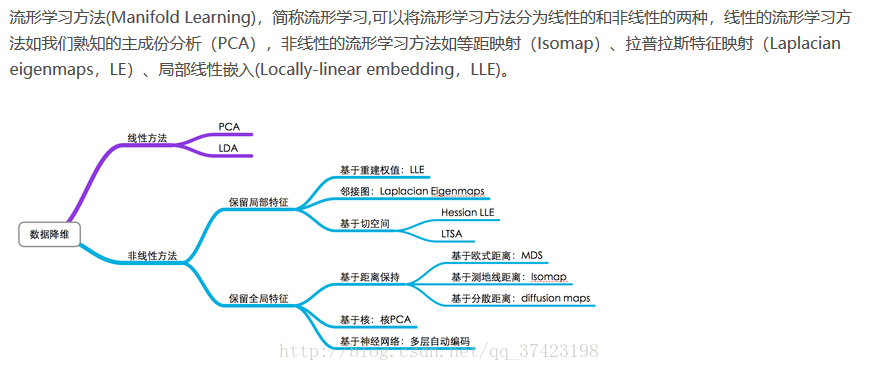

In [27]:
from sklearn import datasets
iris = datasets.load_iris() # 导入数据集
X = iris.data # 获得其特征向量

In [28]:
from sklearn import manifold
#降维
tsne = manifold.TSNE(n_components=2, init='pca', random_state=0)
start_time = time.time()
X_tsne = tsne.fit_transform(X)

In [32]:
X[:8,], X_tsne[:8,:]

(array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2]]),
 array([[-25.117199,   9.059608],
        [-22.541553,   8.045611],
        [-22.43601 ,   9.26376 ],
        [-22.081423,   8.979576],
        [-25.10737 ,   9.551804],
        [-27.10377 ,   9.484345],
        [-22.70989 ,   9.847755],
        [-24.377878,   8.90527 ]], dtype=float32))

# 实例

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time
from sklearn.datasets import load_digits

Dataset consist of 1264 samples with 64 features each


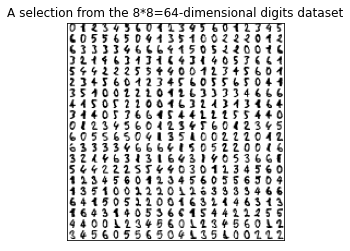

In [2]:
# In[直接从sklearn中load数据集]
from sklearn.datasets import load_digits
digits = load_digits(n_class=7)
X = digits.data
y = digits.target
n_samples, n_features = X.shape
print("Dataset consist of %d samples with %d features each" % (n_samples, n_features))

# 绘制数字示意图
n_img_per_row = 20
img = np.zeros((10 * n_img_per_row, 10 * n_img_per_row))
for i in range(n_img_per_row):
    ix = 10 * i + 1
    for j in range(n_img_per_row):
        iy = 10 * j + 1
        img[ix:ix + 8, iy:iy + 8] = X[i * n_img_per_row + j].reshape((8, 8))

plt.imshow(img, cmap=plt.cm.binary)
plt.xticks([])
plt.yticks([])
_ = plt.title('A selection from the 8*8=64-dimensional digits dataset')
plt.show()

In [3]:
from matplotlib import offsetbox
def plot_embedding(X, title=None):
    x_min, x_max = np.min(X, 0), np.max(X, 0)
    X = (X - x_min) / (x_max - x_min)#归一化
    print(X)
    
    plt.figure(figsize=(10, 10))
    ax = plt.subplot(111)
    for i in range(X.shape[0]):
        plt.text(X[i, 0], X[i, 1], str(digits.target[i]),
                 color=plt.cm.Set1(y[i] / 10.),
                 fontdict={'weight': 'bold', 'size': 12})
    
    #打印彩色字体
    if hasattr(offsetbox, 'AnnotationBbox'):
        # only print thumbnails with matplotlib > 1.0
        shown_images = np.array([[1., 1.]])  # just something big
        for i in range(digits.data.shape[0]):
            dist = np.sum((X[i] - shown_images) ** 2, 1)
            if np.min(dist) < 4e-3:
                # don't show points that are too close
                continue
            shown_images = np.r_[shown_images, [X[i]]]
            imagebox = offsetbox.AnnotationBbox(
                offsetbox.OffsetImage(digits.images[i], cmap=plt.cm.gray_r),
                X[i])
            ax.add_artist(imagebox)#输出图上输出图片
    plt.xticks([]), plt.yticks([])
    if title is not None:
        plt.title(title)

# 随机投射(Random-Projection)

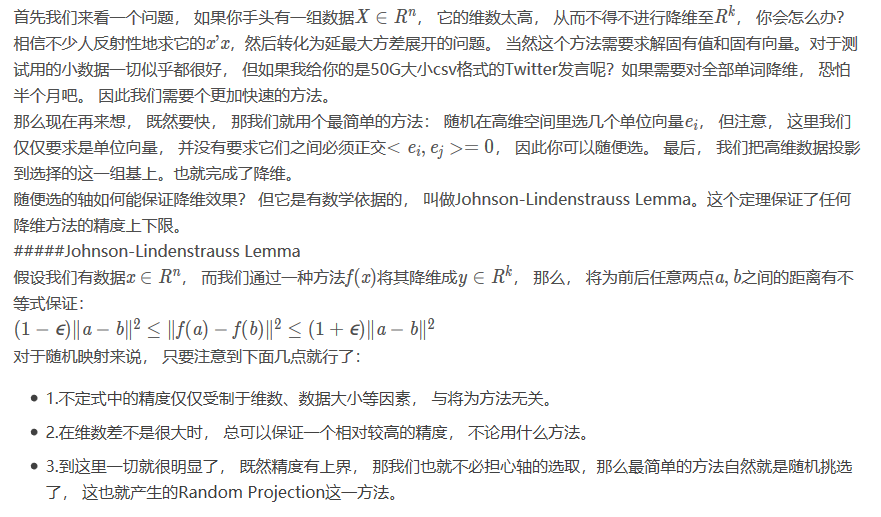

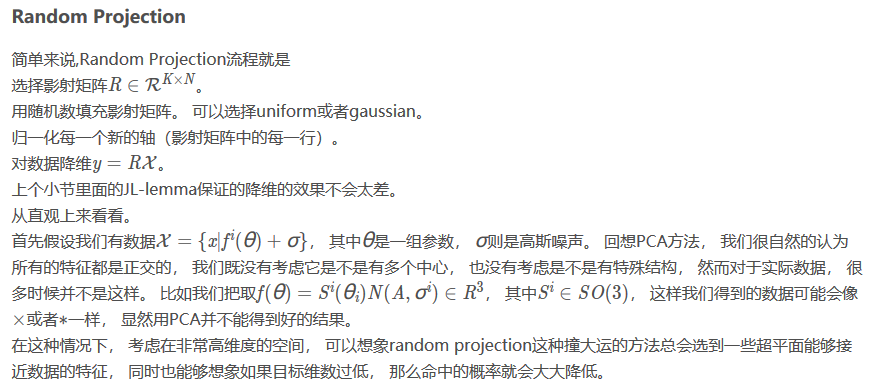

[[0.48       0.45454545]
 [0.48       0.06060606]
 [0.62       0.27272727]
 ...
 [0.42       0.03030303]
 [0.48       0.06060606]
 [0.64       0.33333333]]


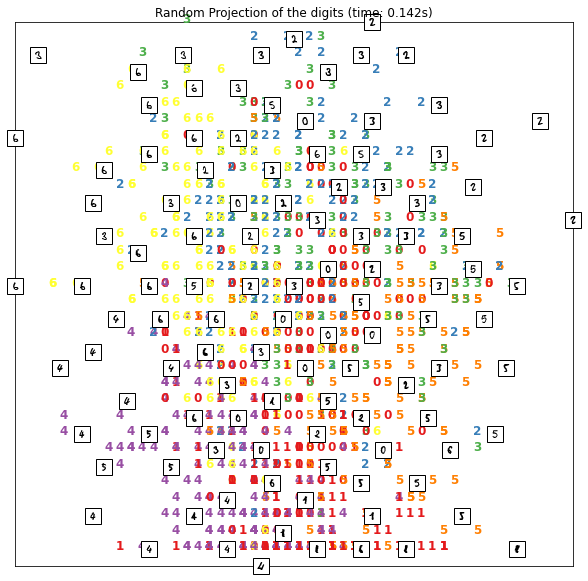

In [4]:
from sklearn import random_projection
rp = random_projection.SparseRandomProjection(n_components=2, random_state=42)
#随机映射算法
start_time = time.time()
X_projected = rp.fit_transform(X)#随机投射
plot_embedding(X_projected, "Random Projection of the digits (time: %.3fs)" % (time.time() - start_time))
plt.show()

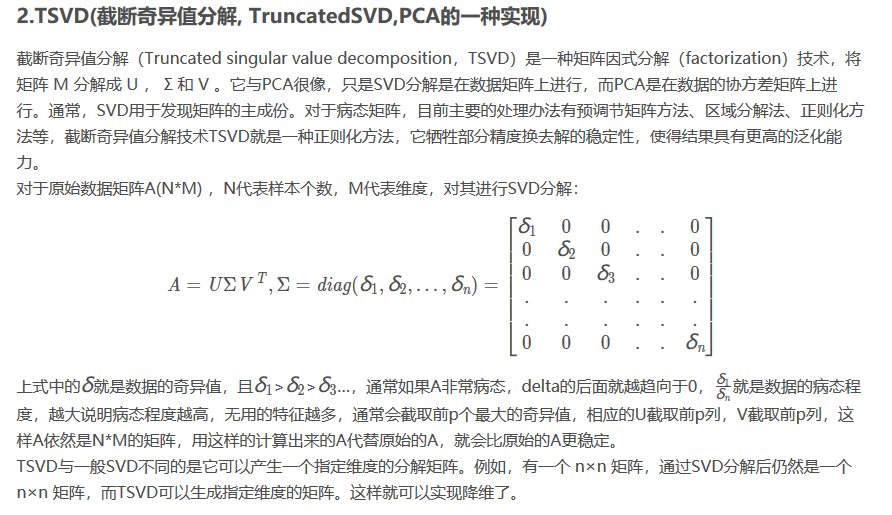

In [5]:
import numpy as np
from scipy.linalg import svd
D = np.array([[1, 2], [1, 3], [1, 4]])
print(D)

[[1 2]
 [1 3]
 [1 4]]


In [6]:
U, S, V = svd(D, full_matrices=False)
U.shape, S.shape, V.shape

((3, 2), (2,), (2, 2))

In [7]:
np.dot(U.dot(np.diag(S)), V)#还原

array([[1., 2.],
       [1., 3.],
       [1., 4.]])

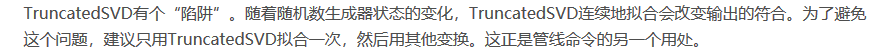

[[0.29204868 0.61150735]
 [0.55012603 0.4271001 ]
 [0.54872692 0.49229278]
 ...
 [0.47322772 0.95991459]
 [0.55749629 0.98473412]
 [0.77934603 0.70698075]]


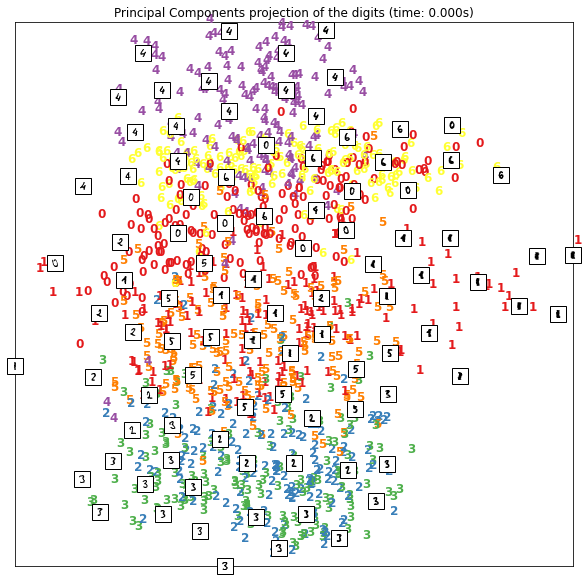

In [8]:
from sklearn import decomposition
X_pca = decomposition.TruncatedSVD(n_components=2).fit_transform(X)
start_time = time.time()
plot_embedding(X_pca,"Principal Components projection of the digits (time: %.3fs)" % (time.time() - start_time))
plt.show()

# t-SNE(t-分布邻域嵌入算法)

[[0.5637899  0.07507204]
 [0.53585154 0.8800147 ]
 [0.42927256 0.85359126]
 ...
 [0.8475123  0.74781775]
 [0.8804453  0.75671726]
 [0.6258306  0.1482027 ]]


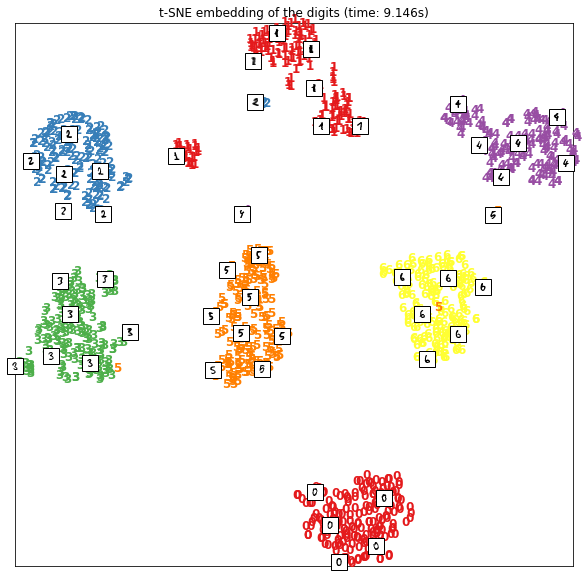

In [9]:
from sklearn import manifold
#降维
tsne = manifold.TSNE(n_components=2, init='pca', random_state=0)
start_time = time.time()
X_tsne = tsne.fit_transform(X)
#绘图
plot_embedding(X_tsne,
               "t-SNE embedding of the digits (time: %.3fs)" % (time.time() - start_time))
plt.show()
#这个非线性变换降维过后，仅仅2维的特征，就可以将原始数据的不同类别，在平面上很好地划分开。
#不过t-SNE也有它的缺点，一般说来，相对于线性变换的降维，它需要更多的计算时间。